# EDA

## Prerequisites

The Yelp dataset is compromised of multiple JSONs based on user, business, review, etc. After constructing a database to manage the load of all the JSONs (+10GB), we queried the database to return a 5% sample of only essential columns for exploration. Documentation will be below. 

Otherwise, we're mainly just importing necessary packages, checking the dtypes, and first few rows. 

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

yelp_sample = pd.read_csv('under-sample.csv', index_col='Unnamed: 0')

In [2]:
yelp_sample.head()

,business_id,user_id,text,cool,stars,date,funny,review_id,useful,average_user_stars,...,address,city,state,latitude,longitude,average_business_stars,recieved_reviews,categories,attributes,tip_review
0,ZeJjnl4o5sffMxPTt7h6ug,CNPZ2ZjDu-lNPKi6f5wEIA,I tried to give this company the benefit of th...,0,1.0,2015-09-09 15:02:48+00:00,0,Zs2sKoUKASUe_WsGpQuE8A,5,2.20,...,241 Boro Line Rd,kop,PA,40.102683,-75.355972,2.0,70,"Automotive, Auto Repair, Towing",{'BusinessAcceptsCreditCards': 'False'},NaN
1,Ccs-77XZCWf1aOozv6U-Ww,nJVAtTBB-25RiomzBB8bHw,We ended up here through serendipity... White ...,0,5.0,2017-11-18 19:59:59+00:00,0,Eju6FaSp93TC_g06mwwFzA,0,2.82,...,209 Vineyard Rd,Atco,NJ,39.738343,-74.886403,4.5,53,"Food, Arts & Entertainment, Wineries","{'GoodForKids': 'False', 'RestaurantsPriceRang...",NaN
2,FHdgpBT2Br7BL-V3gglIkA,zZOjl_mlBoqJN22dD5nbpQ,Bouncers were actively enforcing CDC/ social d...,0,5.0,2020-06-27 04:51:22+00:00,0,ulSlOe8dnv8mjLvLtly8hQ,0,3.67,...,286 White Horse Pike,Atco,NJ,39.772589,-74.900347,3.0,58,"American (Traditional), Nightlife, Bars, Sport...","{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",NaN
3,FHdgpBT2Br7BL-V3gglIkA,DWO5d7GJWB2Mmuv67yY_fQ,Its a place that I comfortable but I hate when...,0,2.0,2016-01-08 22:35:17+00:00,0,dISAAuF9njJb6pT2J1ILuQ,0,3.85,...,286 White Horse Pike,Atco,NJ,39.772589,-74.900347,3.0,58,"American (Traditional), Nightlife, Bars, Sport...","{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",NaN
4,FHdgpBT2Br7BL-V3gglIkA,fJrZ-1B0ngdgM_2qQY_6BA,Great food and great staff! There racks Mack b...,0,5.0,2019-04-12 20:31:51+00:00,0,MlSZu7iI4pbCl7MY0eFXgA,0,3.67,...,286 White Horse Pike,Atco,NJ,39.772589,-74.900347,3.0,58,"American (Traditional), Nightlife, Bars, Sport...","{'Alcohol': ""u'full_bar'"", 'BusinessAcceptsCre...",NaN


In [3]:
yelp_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327662 entries, 0 to 327661
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   business_id             327662 non-null  object 
 1   user_id                 327662 non-null  object 
 2   text                    327662 non-null  object 
 3   cool                    327662 non-null  int64  
 4   stars                   327662 non-null  float64
 5   date                    327662 non-null  object 
 6   funny                   327662 non-null  int64  
 7   review_id               327662 non-null  object 
 8   useful                  327662 non-null  int64  
 9   average_user_stars      327661 non-null  float64
 10  yelping_since           327661 non-null  object 
 11  submitted_reviews       327661 non-null  float64
 12  name                    327662 non-null  object 
 13  address                 323650 non-null  object 
 14  city                    3

| Variable                  | Description                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| business_id (object)      | 22 character unique string business id                                      |
| user_id (object)          | 22 character unique user id, maps to the user in user.json                  |
| text (object)             | the review itself                                                           |
| cool (int64)              | number of cool votes received on the review                                 |
| stars (float64)           | star rating of the review                                                   |
| date (object)             | date formatted YYYY-MM-DD for the review                                    |
| funny (int64)             | number of funny votes received                                              |
| review_id (object)        | 22 character unique review id                                               |
| useful (int64)            | number of useful votes received for the review                              |
| average_user_stars (float64) | average rating of all reviews for a user                                  |
| yelping_since (object)    | when the user joined Yelp, formatted like YYYY-MM-DD                        |
| submitted_reviews (float64) | the number of reviews they've written                                     |
| name (object)             | the user's first name                                                       |
| address (object)          | the full address of the business                                            |
| city (object)             | the city of the business                                                    |
| state (object)            | 2 character state code where the business is located, if applicable         |
| latitude (float64)        | latitude of business location                                               |
| longitude (float64)       | longitude of business location                                              |
| average_business_stars (float64) | star rating for a business, rounded to half-stars                       |
| received_reviews (int64)  | number of reviews a business has received                                   |
| categories (object)       | array of strings of business categories                                     |
| attributes (object)       | business attributes to values. note: some attribute values might be objects |
| tip_review (object)       | text of the tip left by a user                                              |


It will be nice to know how many businesses, users, and unique reviews are in the dataset. Here's a quick look into this

In [4]:
# Loop through Keys and print their length
for col in ['user_id', 'business_id', 'review_id']:
    print(f'There are {yelp_sample[col].nunique()} unique {col}s in the sample\n')
    
print(f'The length of the sample is {len(yelp_sample)} observations')

There are 231044 unique user_ids in the sample

There are 85697 unique business_ids in the sample

There are 326726 unique review_ids in the sample

The length of the sample is 327662 observations


This checks out. Many users go to the same businesses, so there should be more unique users. Additionally, the amount of unique `review_id` matches the length of the dataset. Meaning we can ensure no errors in the query that got us our sample

## Data Cleaning and Transformations

For the most part, the dataset is pretty clean. We can do basic checks for things like nulls and dropping unneeded columns, but the only big issue will be `category`, as it is stored in the JSONs as an object. We will have to find a way to generalize to better fit our objective

In [5]:
# [Jose Salerno] Dropping columns 
yelp_sample.drop(columns=['address', 'tip_review', 'attributes'], inplace=True)

Doing a quick check for null amounts per column here, just to ensure it's okay to drop nans without significant change to the dataset

In [6]:
## [Jose Salerno] checking nulls
yelp_sample.isna().sum()

business_id                0
user_id                    0
text                       0
cool                       0
stars                      0
date                       0
funny                      0
review_id                  0
useful                     0
average_user_stars         1
yelping_since              1
submitted_reviews          1
name                       0
city                       0
state                      0
latitude                   0
longitude                  0
average_business_stars     0
recieved_reviews           0
categories                29
dtype: int64

In [7]:
# [Jose Salerno] dropping null values
yelp_sample.dropna(inplace=True)

### Generalizing Category

`categories` might be pretty valuable towards the end of the analysis, considering we may want to apply some supervised techniques. However, a business can take on many specific categories, which are stored as an array in the `categories` column. Generalizing these will be necessary to apply any supervised ML later down the line.

In [8]:
print(f'There are {yelp_sample["categories"].nunique()} unique category arrays')
yelp_sample['categories'].unique()

There are 52591 unique category arrays


array(['Automotive, Auto Repair, Towing',
       'Food, Arts & Entertainment, Wineries',
       'American (Traditional), Nightlife, Bars, Sports Bars, Restaurants',
       ...,
       'Automotive, Auto Glass Services, Glass & Mirrors, Home Services, Windshield Installation & Repair',
       'Home & Garden, Shopping, Home Services, Lighting Fixtures & Equipment',
       'Medical Spas, Massage, Beauty & Spas, Health & Medical, Nail Salons, Hair Salons'],
      dtype=object)

We tried to consider lots of options (ChatGPT, association rules, thresholds, etc). Ultimately it made the most sense to brute force it, as this will be a one and done solution even if we scale the sample later. This is a little subjective, but there isn't much gray area in the dataset. Below is the process.

In [9]:
# [Jose Salerno] Generalization of distinct categories 
restaurant_categories = ['Food Stands','Brasseries','Cheese Shops','Fish & Chips','Szechuan','African','Malaysian','Acai Bowls','Waffles','Food', 'Local Flavor', 'Canadian (New)', 'Vietnamese', 'Italian', 'Buffets', 'Burgers', 'American (Traditional)', 'American (New)', 'Breakfast & Brunch', 'Sandwiches', 'Seafood', 'Mexican', 'Pizza', 'Cajun/Creole', 'Sushi Bars', 'Chinese', 'Japanese', 'Steakhouses', 'Cafes', 'Salad', 'Fast Food', 'Bakeries', 'Ice Cream & Frozen Yogurt', 'Desserts', 'Barbeque', 'Thai', 'Specialty Food', 'Asian Fusion', 'Southern', 'Diners', 'Mediterranean', 'Delis', 'Caterers', 'Chicken Wings', 'Vegetarian', 'Indian', 'Comfort Food', 'Latin American', 'French', 'Vegan', 'Greek', 'Gluten-Free', 'Tex-Mex', 'Korean', 'Soup', 'Donuts', 'Live/Raw Food', 'Tacos', 'Tapas/Small Plates', 'Gastropubs', 'Food Delivery Services', 'Pakistani', 'Tapas Bars', 'Cheesesteaks', 'Soul Food', 'Ethnic Food', 'Middle Eastern', 'German', 'Bagels', 'Food Trucks', 'Hot Dogs', 'Noodles', 'Creperies', 'Spanish', 'Caribbean', 'Chicken Shop', 'Ramen', 'Cuban', 'Irish', 'Basque', 'Halal', 'Dim Sum', 'New Mexican Cuisine', 'Poke', 'Seafood Markets', 'British', 'Gelato', 'Cupcakes', 'Ethiopian', 'Peruvian', 'Falafel', 'Custom Cakes', 'Pasta Shops', 'Kebab', 'Hot Pot', 'Puerto Rican', 'Dominican', 'Salvadoran', 'Cafeteria', 'Pancakes', 'Senegalese', 'Sri Lankan', 'Parent Cafes','Food Banks','Food Banks','Afghan','Izakaya','Indonesian','Imported Food','Venezuelan','Pretzels','Smokehouse','Shanghainese','Patisserie/Cake Shop','Kosher','Shaved Ice','Filipino','Personal Chefs','Chocolatiers & Shops','Irish Pub','Bed & Breakfast','Taiwanese','Brazilian','Modern European','Wraps','Cantonese','Hawaiian','Candy Stores']

beauty = ["Men's Hair Salons",'Nail Technicians','Beauty & Spas', 'Nail Salons', 'Cosmetics & Beauty Supply', 'Hair Salons', 'Massage', 'Skin Care', 'Waxing', 'Eyelash Service', 'Barbers', 'Tanning', 'Threading Services', 'Day Spas', 'Piercing', 'Blow Dry/Out Services', 'Makeup Artists', 'Hair Removal', 'Eyebrow Services', 'Hair Stylists', 'Tattoo', 'Laser Hair Removal', 'Massage Therapy', 'Pedicures', 'Medical Spas', 'Hair Extensions', 'Reflexology', 'Hair Loss Centers', 'Acupuncture', 'Pole Dancing Classes', 'Float Spa', 'Cryotherapy', 'Sugaring', 'Permanent Makeup', 'Saunas','Massage Schools']

bars = ['Beer Gardens','Wineries','Bars', 'Nightlife', 'Beer', 'Wine Bars', 'Cocktail Bars', 'Sports Bars', 'Pubs', 'Breweries', 'Gastropubs', 'Beer Bar', 'Wine Tasting Room', 'Dive Bars', 'Karaoke', 'Speakeasies', 'Gay Bars', 'Juice Bars & Smoothies', 'Hookah Bars', 'Brewpubs', 'Cigar Bars', 'Champagne Bars', 'Tiki Bars','Meaderies','Distilleries','Whiskey Bars']

hotels = ['Hotels','Resorts']

auto = ['Gas Stations','Used','Auto Repair','Car Dealers','Oil Change Stations','Auto Parts & Supplies','Tires','Car Wash','Body Shops','Car Rental','Auto Detailing','Auto Loan Providers','Trailer Rental','Departments of Motor Vehicles','Motorcycle Rental','Mobile Dent Repair','Motorsport Vehicle Dealers','Bike tours','Crane Services','Auto Insurance','Car Share Services','Motorsport Vehicle Repairs','Wheel & Rim Repair','Transmission Repair','Windshield Installation & Repair','Auto Glass Services','Used Car Dealers']

venues = ['Wedding Planning','Venues & Event Spaces','Party & Event Planning','Music Venues']

fitness = ['Fitness & Instruction','Gyms','Kickboxing','Aerial Fitness','Yoga']

entertainment = ['Cinema','Museums','Tours','Performing Arts','Arts & Crafts','Jazz & Blues','Landmarks & Historical Buildings','Golf','Art Galleries','Festivals','Stadiums & Arenas','Zoos','Hiking','Bike Rentals','Playgrounds','Professional Sports Teams','Recreation Centers','Art Tours','Country Clubs','Decks & Railing','Mountain Biking','Dinner Theater','Tabletop Games','Aerial Tours','Party Bike Rentals','Game Truck Rental','Psychic Mediums', "Walking Tours", "Boat Tours", "Brewery Tours", "Wine Tours", "Air Tours", "Hot Air Balloons",  "Aerial Tours",'Buses','Firearm Training','Disc Golf','High Fidelity Audio Equipment','Vacation Rental Agents','Matchmakers','Free Diving','Ranches','Bicycles','Farm Equipment Repair','Golf Lessons','Racing Experience','Face Painting','Botanical Gardens','Comedy Clubs','Sports Clubs','Gun/Rifle Ranges','Amusement Parks','Photographers','Cards & Stationery','Fishing','Boat Charters','Bowling','Arcades','Airports','Escape Games','Boating','Casinos','Beaches','Art Museums']

medical = ['Hospitals','Urgent Care','Doctors','Dentists','General Dentistry','Eyewear & Opticians','Medical Centers','Cosmetic Dentists','Chiropractors','Optometrists','Reflexology','Orthodontists','Periodontists','Medical Cannabis Referrals','Pain Management','Surgeons','Allergists','Anesthesiologists','Body Contouring','Dialysis Clinics','Reproductive Health Services','Memory Care','Preventive Medicine','Lice Services','Medical Transportation','Prosthodontists','CPR Classes','Retina Specialists','Nephrologists','Sex Therapists','Ophthalmologists','Obstetricians & Gynecologists','Dermatologists','Physical Therapy','Oral Surgeons','Pharmacy','Pediatric Dentists','Family Practice','Diagnostic Services']

nightlife = ['Dance Clubs','Strip Clubs','Adult Entertainment','Dance Clubs']

home_services = ['Garage Door Services','Laundry Services','Nurseries & Gardening','Home & Garden','Building Supplies','Movers','Apartments','Real Estate','Contractors','Heating & Air Conditioning/HVAC','Furniture Stores','Home Decor','Plumbing','Appliances & Repair','Mattresses','Sewing & Alterations','Home Cleaning','Appliances','Pest Control','Property Management','Landscaping','Kitchen & Bath','Real Estate Agents','Electricians','Carpeting','Packing Services','Commercial Real Estate','Decks & Railing','Chimney Sweeps','Countertop Installation','Home Network Installation','Roof Inspectors','Outdoor Power Equipment Services','Home & Rental Insurance','House Sitters','Assisted Living Facilities','Bounce House Rentals','Awnings','Safety Equipment','Internet Service Providers','Windows Installation','Roofing','Carpet Cleaning','Flooring','Security Systems','Keys & Locksmiths','Tree Services','Water Heater Installation/Repair']

shopping = ['Electronics','Mobile Phones','Bridal','Discount Store','Hardware Stores','Antiques','Department Stores','Jewelry','Fashion','Sporting Goods',"Women's Clothing",'Drugstores','Convenience Stores','Accessories','Trainers','Health Markets','Shopping Centers','Shoe Stores','Thrift Stores',"Men's Clothing",'Piercing','Tobacco Shops','Hobby Shops','Shoe Repair','Screen Printing/T-Shirt Printing','Rugs','Hunting & Fishing Supplies','Wigs','Sunglasses','Hockey Equipment','Storefront Clinics','Snorkeling','Perfume','Local Fish Stores','Concept Shops','Jewelry Repair','Bike Repair/Maintenance','Watches','Guns & Ammo','Vape Shops',"Children's Clothing",'Mobile Phone Repair','Spray Tanning','Electronics Repair','Computers','Sports Wear','Bikes','Toy Stores','Printing Services','Music & DVDs','Bookstores','Outdoor Gear','IT Services & Computer Repair','Street Vendors']

coffee_tea = ['Bubble Tea','Coffee Roasteries','Tea Rooms','Internet Cafes']

pets = ['Pet Services','Veterinarians','Pet Stores','Pet Hospice','Pet Insurance','Pet Photography','Pet Groomers','Pets']

groceries = ['Fruits & Veggies','Wholesale Stores','Wholesalers','Organic Stores','Farmers Market','Meat Shops']

legal = ['Public Services & Government','Shipping Centers','Self Storage','Legal Services','Divorce & Family Law','Billing Services','Land Surveying','Fingerprinting','Traffic Ticketing Law','Investing','Excavation Services','Aestheticians','Environmental Abatement','Junk Removal & Hauling','Legal Services','Home Inspectors','Towing','Couriers & Delivery Services','Financial Services','Notaries','Real Estate Services','Transportation']

florist = ['Florists','Gift Shops']

education = ['Books','Bookbinding','Career Counseling','Tutoring Centers','Parenting Classes','Buddhist Temples','Architects','Religious Schools','Vocal Coach','Self-defense Classes','Bail Bondsmen','Day Camps','Smog Check Stations','Bookbinding','Religious Organizations','Community Service/Non-Profit','Specialty Schools','Education']

In [10]:
# [Jose Salerno] splitting the categories column to create a new general category 

# all categories are pretty closely related so the first index should give enough info to generalize
yelp_sample['category'] = yelp_sample['categories'].str.split(',').str[0].str.strip()

# assign a category frequency threshold and filter on it
categories = yelp_sample['category'].value_counts()
selected_categories = categories[categories > 50].index.tolist()

pruned = yelp_sample[yelp_sample['category'].isin(selected_categories)]

In [11]:
# [Jose Salerno] Creating General Category with the lists of categories

# maps each isin to the list of Generalized Categories, else 'Other'
pruned['general_category'] = np.select(
    [
        pruned['category'].isin(restaurant_categories),
        pruned['category'].isin(beauty),
        pruned['category'].isin(bars),
        pruned['category'].isin(hotels),
        pruned['category'].isin(auto),
        pruned['category'].isin(venues),
        pruned['category'].isin(fitness),
        pruned['category'].isin(entertainment),
        pruned['category'].isin(medical),
        pruned['category'].isin(nightlife),
        pruned['category'].isin(home_services),
        pruned['category'].isin(shopping),
        pruned['category'].isin(coffee_tea),
        pruned['category'].isin(pets),
        pruned['category'].isin(groceries),
        pruned['category'].isin(legal),
        pruned['category'].isin(florist),
        pruned['category'].isin(education)
    ],
    [
        'Restaurant',
        'Beauty',
        'Bars',
        'Hotels',
        'Auto',
        'Venues',
        'Fitness',
        'Entertainment',
        'Medical',
        'Nightlife',
        'Home_Services',
        'Shopping',
        'Coffee_Tea',
        'Pets',
        'Groceries',
        'Legal',
        'Florist',
        'Education'
    ],
    default='Other'
)

/var/folders/x3/42y9jxy964lg3yyk_9zhss280000gn/T/ipykernel_98485/1400423589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pruned['general_category'] = np.select(


In [12]:
# [Jose Salerno] Checking value counts of each category
pruned['general_category'].value_counts()

general_category
Restaurant       138581
Other             94800
Bars              31021
Beauty            14811
Shopping           6790
Home_Services      6663
Auto               6266
Entertainment      4365
Medical            2909
Pets               2814
Hotels             2158
Legal              1953
Venues             1876
Fitness            1093
Education           887
Coffee_Tea          550
Groceries           541
Nightlife           393
Florist             265
Name: count, dtype: int64

We've reduced the amount of categories drastically. Hopefully this will pay off in the long run.

## General Insights

In [13]:
pruned.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cool,318736.0,0.523204,2.467280,0.000000,0.000000,0.000000,0.000000,400.000000
stars,318736.0,3.756959,1.470497,1.000000,3.000000,4.000000,5.000000,5.000000
funny,318736.0,0.337919,1.678052,0.000000,0.000000,0.000000,0.000000,241.000000
useful,318736.0,1.197489,3.227443,0.000000,0.000000,0.000000,1.000000,400.000000
average_user_stars,318736.0,3.749061,0.855493,1.000000,3.400000,3.890000,4.290000,5.000000
submitted_reviews,318736.0,128.845609,365.043849,0.000000,7.000000,25.000000,103.000000,17473.000000
latitude,318736.0,35.950989,5.350242,27.555127,29.964702,38.603630,39.942863,53.656598
longitude,318736.0,-89.746021,14.861227,-120.095137,-90.305181,-86.227026,-75.512763,-74.661348
average_business_stars,318736.0,3.753315,0.743045,1.000000,3.500000,4.000000,4.500000,5.000000
recieved_reviews,318736.0,377.290385,743.014910,5.000000,46.000000,141.000000,375.000000,7568.000000


Variance seems to be decent here, considering lots of the numerical values for ratings, users, and businesses are on a 0-5 ordinal scale

### Visualizing Insights

#### Most Frequent Categories

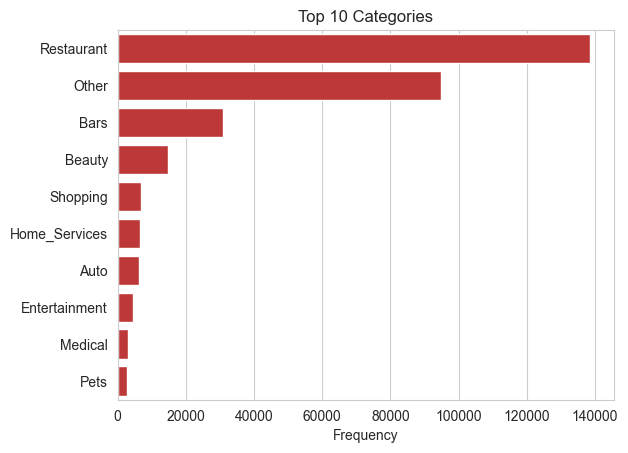

In [14]:
top_10_categories = pruned['general_category'].value_counts().reset_index().sort_values(by='count', ascending=False).head(10)
sns.barplot(top_10_categories, x='count', y='general_category', color='#d32323')

plt.title('Top 10 Categories')
plt.ylabel(None)
plt.xlabel('Frequency');

#### Business Location Density (on map)

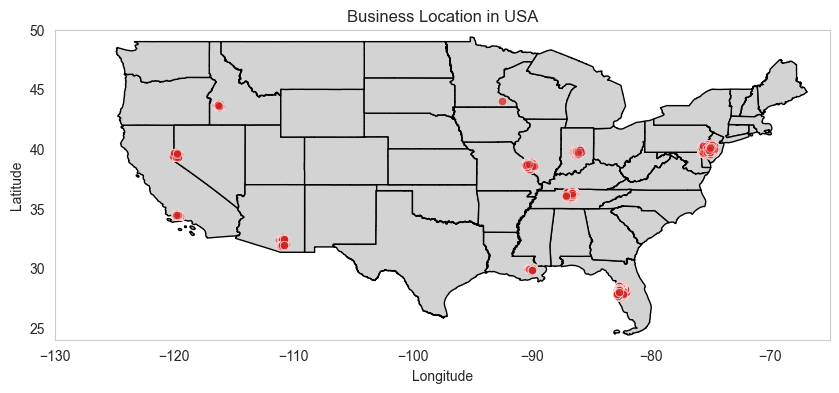

In [15]:
usa = gpd.read_file('tl_2023_us_state.shx')
geometry = [Point(lon, lat) for lon, lat in zip(pruned['longitude'], pruned['latitude'])]
gdf = gpd.GeoDataFrame(pruned, geometry=geometry, crs='EPSG:4326')

ax = usa.plot(figsize=(10, 10), color='lightgray', edgecolor='black')
sns.scatterplot(data=pruned, x='longitude', y='latitude', alpha=.5, color='#d32323')

ax.set_title('Business Location in USA')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([-130, -65])
ax.set_ylim([24, 50])  
plt.grid(visible=False)
plt.show()

#### Distribution of Business and User Ratings

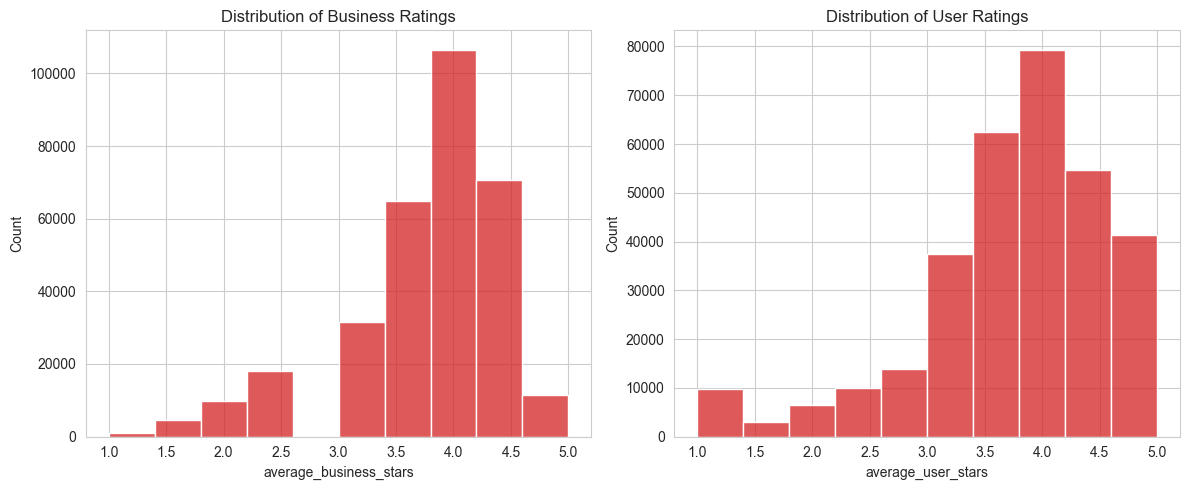

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# business hist
sns.histplot(pruned['average_business_stars'], bins=10, ax=axs[0], color='#d32323')
axs[0].set_title('Distribution of Business Ratings')

# user hist
sns.histplot(pruned['average_user_stars'], bins=10, ax=axs[1], color='#d32323')
axs[1].set_title('Distribution of User Ratings')

plt.tight_layout()
plt.show()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


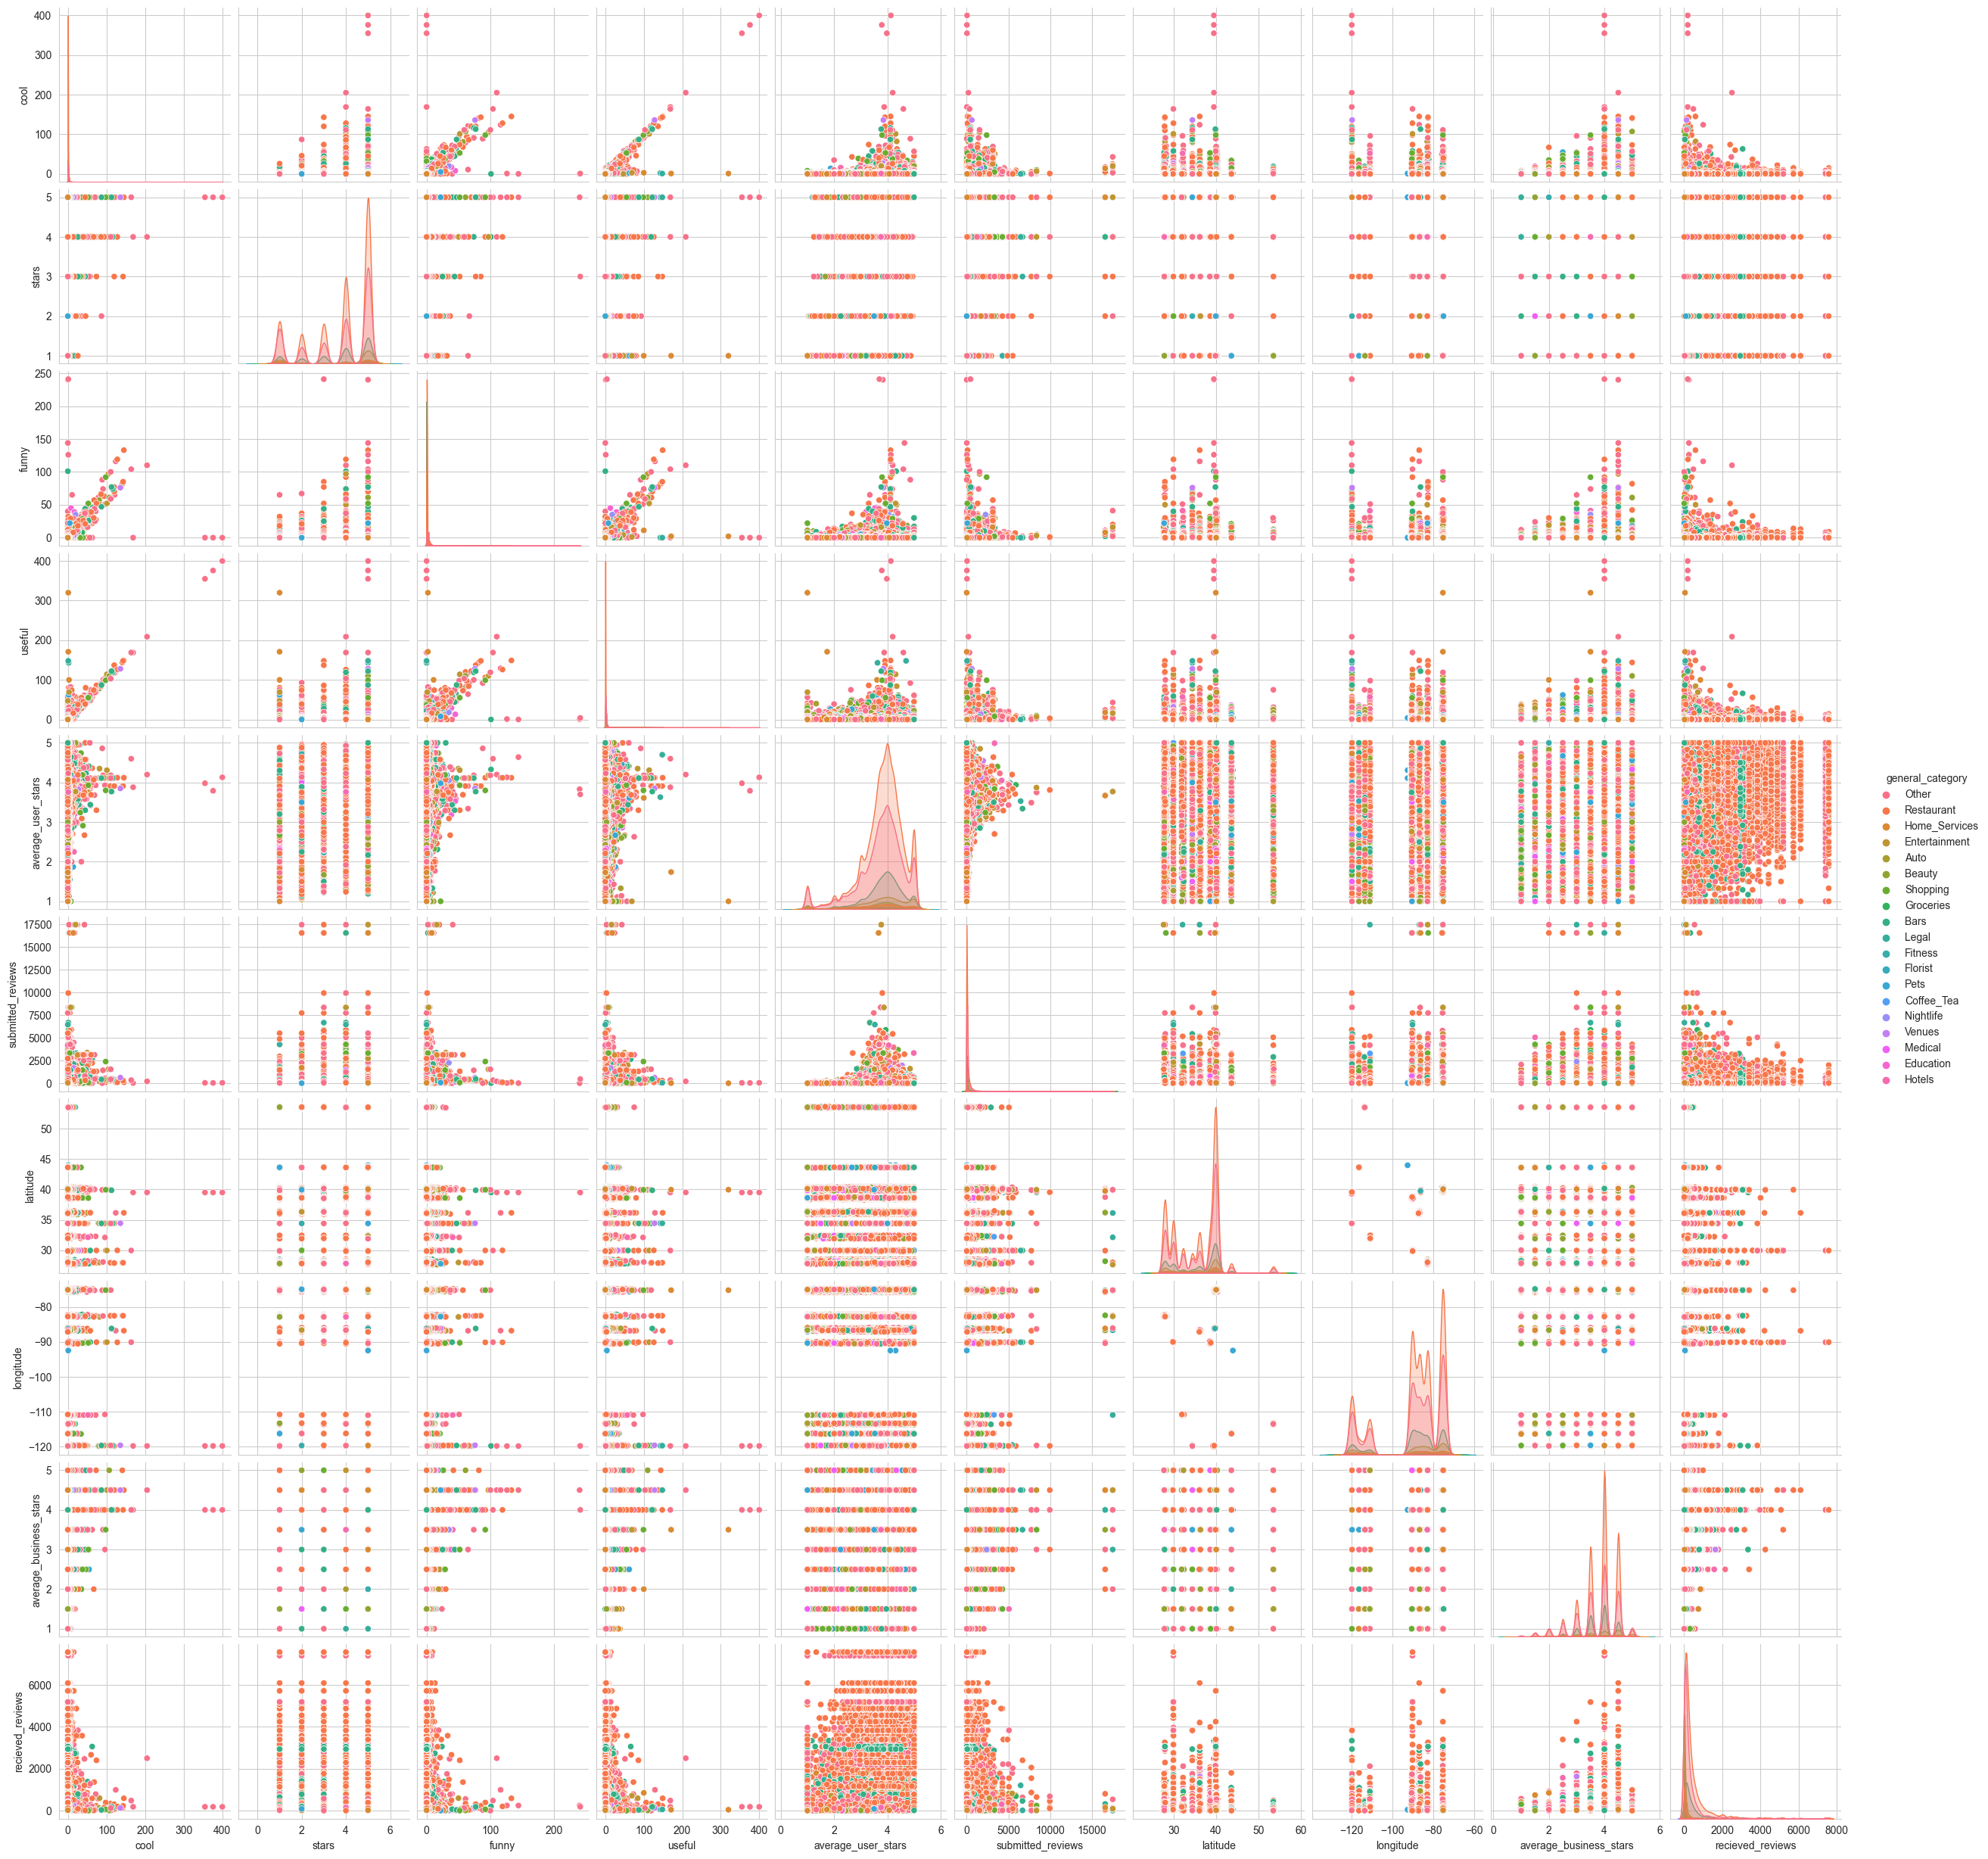

In [17]:
sns.pairplot(data=pruned, hue='general_category')

# Review Text Tokenization, Transformations, and Embeddings

## w2v-embedder.py

This is a separate script that deals with all the necessary steps to tokenize, preprocess, and embed all of the reviews text data. It runs separately and returns outputs as npy files to mitigate needing to rerun the embeddings (since they take quite some time). To get the embeddings you only need the dictionary of the word keys so there is no need to actually train a Word2Vec

In [ ]:
import pandas as pd
import numpy as np
import nltk
from gensim.models import Word2Vec
from gensim.parsing import PorterStemmer
from nltk import WordNetLemmatizer, word_tokenize
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# stem and lemmatize objects
stem = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))


# takes a token (str) and a model (object).... Word2Vec in this case
# returns a word embedding or an appropriately sized vector of zeroes depending on the models keys
def embed(word, model):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(model.vector_size)


# takes a review and recompiles it to a review with only stems of non-homonyms, excluding stop words
def process_text(text):
    tokens = word_tokenize(text)
    w: str
    tokens = [w for w in tokens if
              w not in stop_words]  # list comprehension of tokenized but checks for stop words and filters them out
    # tokens = [stem.stem(w) for w in tokens]
    tokens = [lemmatizer.lemmatize(w) for w in tokens]
    text = ' '.join(tokens)
    return text


# read the reviews in
reviews = pd.read_csv('./data/clean-sample.csv')

# clean
reviews_clean = pd.DataFrame(reviews.text.str.lower().str.strip())
reviews_clean = pd.DataFrame(reviews_clean.text.str.replace(r'/[^a-zA-Z0-9]/g', ''))
reviews_clean = pd.DataFrame(reviews_clean.text.str.replace(r'[^a-zA-Z\s]', ''))
reviews_clean = pd.DataFrame(reviews_clean.text.str.replace(r'[^\w\d\s]', ''))

# tokenize and send to .npy
tokenized = [word_tokenize(w) for w in tqdm(reviews_clean.text.apply(lambda review: process_text(review)), total=len(reviews_clean))]
tokenized = np.array(tokenized, dtype=object)
with open('data/categories_tokenized.npy', 'wb') as file:
    np.save(file, tokenized)

# instantiate a Word2Vec with our embeddings and send to npy, tuning would require knowledge of optimization,
# we'll utilize default params here
w2v = Word2Vec(sentences=tokenized).wv

# embed loop
embeddings = []
for review in tqdm(tokenized):
    embedded = [embed(w, w2v) for w in review]
    rev_embedding = np.mean(embedded if len(embedded) > 0 else [np.zeros(w2v.vector_size)], axis=0)
    embeddings.append(rev_embedding)

embeddings = np.array(embeddings)
with open('./data/category_embeddings.npy', 'wb') as file:
    np.save(file, embeddings)


# Sentiment Analysis

In [2]:
import gensim.downloader as api
import numpy as np
import pandas as pd

tokens = np.load('./data/tokenized.npy', allow_pickle=True)     # loads an already tokenized set from w2v-embedder.py
token_df = pd.DataFrame(tokens, columns=['review'])

# w2v = Word2Vec(sentences=tokens).wv
w2v = api.load('glove-wiki-gigaword-50')        # opting for a pretrained model just because of time constraints... Downsides will be less precise context, as wikipedia text isn't necesarrily 1:1 with a business review on Yelp.

In [3]:
#Sp
positive = ['excellent', 'amazing', 'fantastic', 'wonderful', 'delightful', 'superb', 'incredible', 'outstanding', 'terrific', 'awesome', 
            'good', 'great', 'lovely', 'pleasant', 'enjoyable', 'satisfying', 'impressive', 'favorable', 'positive', 'pleasant', 'perfect']

#Sn
negative = ['terrible', 'awful', 'horrible', 'dreadful', 'abysmal', 'appalling', 'atrocious', 'disgusting', 'revolting', 'abominable', 'bad', 'poor', 
            'unpleasant', 'unsatisfactory', 'disappointing', 'unfavorable', 'negative', 'unenjoyable', 'dissatisfied', 'displeasing']

In [4]:
def sentiment(review):
    if len(review) > 0:
        return w2v.n_similarity(review, positive) - w2v.n_similarity(review, negative)
    else:
        return 0

In [6]:
token_df['sentiment'] = token_df['review'].apply(lambda review: sentiment(review))

<Axes: xlabel='sentiment', ylabel='Count'>

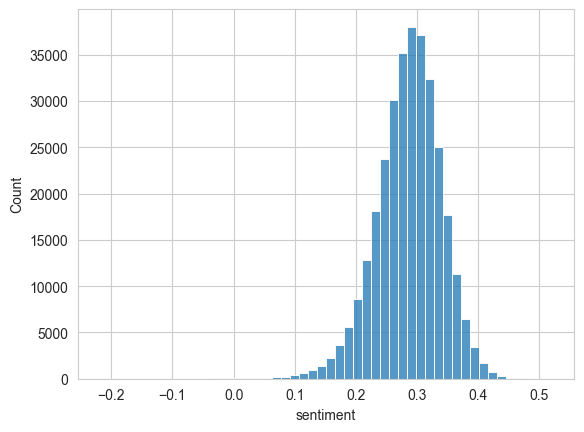

In [8]:
import seaborn as sns

sns.histplot(data=token_df, x='sentiment', bins=50)

In [9]:
token_df['sentiment'].to_csv('./data/sentiments.csv')   # save so you don't have to rerun the method

# Cluster Analysis

In [213]:
import pandas as pd
import numpy as np

embeddings = pd.DataFrame(np.load('./data/embeddings.npy'))        # loads w2v embeddings from w2v-embedder.py
review = pd.read_csv('./data/clean-sample.csv')
sentiment = pd.read_csv('./data/sentiments.csv')                   # loads sentiments from above (this was originally in a different notebook, but compiled for the deliverable)

## Reviews Embedding Clustering with TSNE

In [214]:
from sklearn.manifold import TSNE
sample = len(review)

tsne_embeddings_df = pd.DataFrame(np.load('./data/tsne-embeddings.npy'), columns=['TSNE1', 'TSNE2', 'TSNE3']) # loads a fitted matrix of TSNE components from a separate script (model fit_transform takes 4ish hours)

## for trying out parameters and testing plots and what not
# test_embeddings = embeddings.head(sample)
# tsne = TSNE(n_components=3, learning_rate=100, random_state=42, perplexity=50)
# tsne_embeddings = tsne.fit_transform(test_embeddings)

In [215]:
tsne_embeddings_df

,0,1,2
0,-8.231966,-3.752176,1.760900
1,4.054904,0.691523,0.861077
2,-3.162981,-2.495025,4.349556
3,7.625820,-5.372531,-1.579368
4,0.797706,7.519417,1.429056
...,...,...,...
318731,-8.174581,-4.100935,2.505853
318732,3.784543,2.518679,4.410598
318733,1.655177,4.764998,0.976093
318734,1.187947,4.286292,-0.731306


In [216]:
# tsne_embeddings_df = pd.DataFrame(tsne_embeddings, columns=['TSNE1', 'TSNE2', 'TSNE3'])

tsne_embeddings_df['text'] = review['text'].head(sample)
tsne_embeddings_df['stars'] = review['stars'].head(sample)
tsne_embeddings_df['general_category'] = review['general_category'].head(sample)
tsne_embeddings_df['sentiment'] = sentiment['sentiment'].head(sample)
tsne_embeddings_df['review'] = tsne_embeddings_df['text'].apply(lambda x: x[:10] + '...' if len(x) > 10 else x)

In [217]:
tsne_embeddings_df

,TSNE1,TSNE2,TSNE3,text,stars,general_category,sentiment,review
0,-8.231966,-3.752176,1.760900,I tried to give this company the benefit of th...,1.0,Other,0.242703,I tried to...
1,4.054904,0.691523,0.861077,We ended up here through serendipity... White ...,5.0,Restaurant,0.324215,We ended u...
2,-3.162981,-2.495025,4.349556,Bouncers were actively enforcing CDC/ social d...,5.0,Restaurant,0.184383,Bouncers w...
3,7.625820,-5.372531,-1.579368,Its a place that I comfortable but I hate when...,2.0,Restaurant,0.134130,Its a plac...
4,0.797706,7.519417,1.429056,Great food and great staff! There racks Mack b...,5.0,Restaurant,0.418598,Great food...
...,...,...,...,...,...,...,...,...
318731,-8.174581,-4.100935,2.505853,This family run business is wonderful.. I call...,5.0,Home_Services,0.240952,This famil...
318732,3.784543,2.518679,4.410598,"Was there last night, great food all around. ...",5.0,Restaurant,0.329158,Was there ...
318733,1.655177,4.764998,0.976093,Amazing food! A very cozy atmosphere. As good ...,5.0,Restaurant,0.284808,Amazing fo...
318734,1.187947,4.286292,-0.731306,Came in for the Eagles game and had a wonderfu...,5.0,Bars,0.372036,Came in fo...


In [ ]:
import plotly.express as px

fig = px.scatter_3d(tsne_embeddings_df, x='TSNE1', y='TSNE2', z='TSNE3',
                    hover_data=['review', 'general_category', 'stars', 'sentiment'])

fig.show()

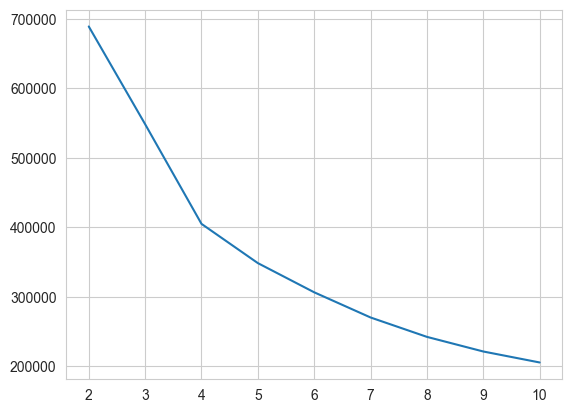

In [219]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_data = tsne_embeddings_df[['TSNE1', 'TSNE2', 'TSNE3']]
cluster_data = scaler.fit_transform(cluster_data)
cluster_data = pd.DataFrame(cluster_data, columns=['TSNE1_scaled', 'TSNE2_scaled', 'TSNE3_scaled'])

tsne_embeddings_df['TSNE1_scaled'] = cluster_data['TSNE1_scaled']
tsne_embeddings_df['TSNE2_scaled'] = cluster_data['TSNE2_scaled']
tsne_embeddings_df['TSNE3_scaled'] = cluster_data['TSNE3_scaled']

inertias = []
ks = range(2, 11)

for k in ks:
  kmeans_result = (KMeans(n_clusters=k, random_state=42, n_init='auto').fit(cluster_data))
  inertias.append(kmeans_result.inertia_)
  
sns.lineplot(x=ks, y=inertias)
plt.show()

In [220]:
kmeans = KMeans(n_clusters=5, n_init='auto')
kmeans.fit(cluster_data)
tsne_embeddings_df['cluster'] = kmeans.predict(cluster_data)

cluster_centers = kmeans.cluster_centers_

In [237]:
import plotly.graph_objects as go

fig = px.scatter_3d(tsne_embeddings_df.head(500), x='TSNE1_scaled', y='TSNE2_scaled', z='TSNE3_scaled', color='cluster',
                    hover_data=['review', 'general_category', 'stars', 'sentiment'])

fig.show()

In [222]:
tsne_embeddings_df.groupby('cluster').describe()

TSNE1                                                               \
           count      mean       std        min       25%       50%       75%   
cluster                                                                         
0        51694.0 -6.216748  2.248627 -10.443450 -8.051485 -6.634801 -4.689111   
1        74533.0  5.051651  2.587863  -1.374817  3.030329  5.160652  7.130321   
2        53331.0 -2.824989  3.827989 -10.271775 -6.221455 -3.072956  0.659522   
3        77613.0  0.757414  3.405129  -7.642719 -1.514547  1.098243  3.240674   
4        61565.0  0.422321  2.911186  -6.518131 -1.827727  0.215948  2.561290   

                      TSNE2            ... TSNE2_scaled            \
               max    count      mean  ...          75%       max   
cluster                                ...                          
0        -0.336242  51694.0 -1.458178  ...     0.021626  1.220936   
1        10.716154  74533.0 -2.207887  ...    -0.131042  0.917051   
2         6.279082  53331.0  0.833075  ...     0.670118  1.851826   
3         9.202623  77613.0  4.121881  ...     1.616729  2.822069   
4         9.175865  61565.0 -2.001032  ...    -0.101914  1.016696   

        TSNE3_scaled                                                    \
               count      mean       std       min       25%       50%   
cluster                                                                  
0            51694.0  0.065084  0.540368 -1.198269 -0.333913  0.033661   
1            74533.0 -0.199085  0.586316 -2.100513 -0.599117 -0.207672   
2            53331.0 -1.539892  0.502099 -2.999683 -1.931737 -1.581038   
3            77613.0  0.237619  0.580041 -1.473228 -0.201299  0.243283   
4            61565.0  1.220751  0.454174  0.055050  0.893831  1.223285   

                             
              75%       max  
cluster                      
0        0.421540  1.538518  
1        0.229793  1.326928  
2       -1.138040 -0.319296  
3        0.646118  2.168833  
4        1.552807  2.529265  

[5 rows x 64 columns]

## Scaled "Supervised" Clustering using stars, sentiment, and category (embedded)

In [223]:
# category_embeddings = pd.DataFrame(np.load('./data/category_embeddings.npy'))

In [224]:
# category_tsne = TSNE(n_components=1, learning_rate=10, perplexity=50, random_state=42)
# categorical_tsne = category_tsne.fit_transform(category_embeddings.head(sample))

categorical_tsne = np.load('./data/tsne-category-embeddings.npy')

tsne_embeddings_df['category_component'] = categorical_tsne

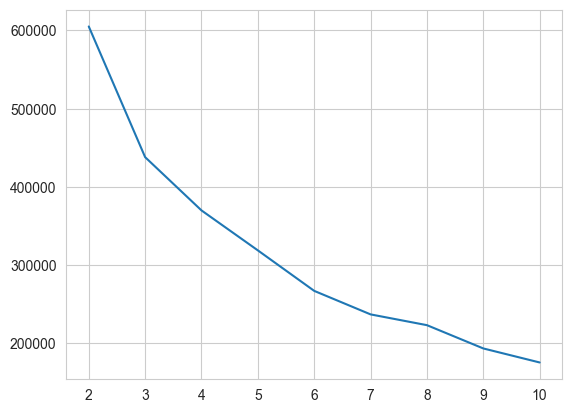

In [225]:
supervised_cluster_data = tsne_embeddings_df[['stars', 'sentiment', 'category_component']]
scaled_supervised_cluster_data = scaler.fit_transform(supervised_cluster_data)
scaled_supervised_cluster_data = pd.DataFrame(scaled_supervised_cluster_data, columns=['stars_scaled', 'sentiment_scaled', 'category_component_scaled'])

tsne_embeddings_df['stars_scaled'] = scaled_supervised_cluster_data['stars_scaled']
tsne_embeddings_df['sentiment_scaled'] = scaled_supervised_cluster_data['sentiment_scaled']
tsne_embeddings_df['category_component_scaled'] = scaled_supervised_cluster_data['category_component_scaled']

inertias = []
ks = range(2, 11)

for k in ks:
  kmeans_result = (KMeans(n_clusters=k, random_state=42, n_init='auto').fit(scaled_supervised_cluster_data))
  inertias.append(kmeans_result.inertia_)
  
sns.lineplot(x=ks, y=inertias)
plt.show()

In [226]:
scaled_kmeans_category = KMeans(n_clusters=3, n_init='auto')
scaled_kmeans_category.fit(scaled_supervised_cluster_data)
tsne_embeddings_df['scaled_supervised_cluster'] = scaled_kmeans_category.predict(scaled_supervised_cluster_data)

scaled_supervised_cluster_centers = scaled_kmeans_category.cluster_centers_

In [240]:
fig = px.scatter_3d(tsne_embeddings_df.head(500), x='stars_scaled', y='sentiment_scaled', z='category_component_scaled', color='scaled_supervised_cluster',
                    hover_data=['review', 'general_category', 'stars', 'sentiment'])

fig.show()

## Unscaled "Supervised" Clustering

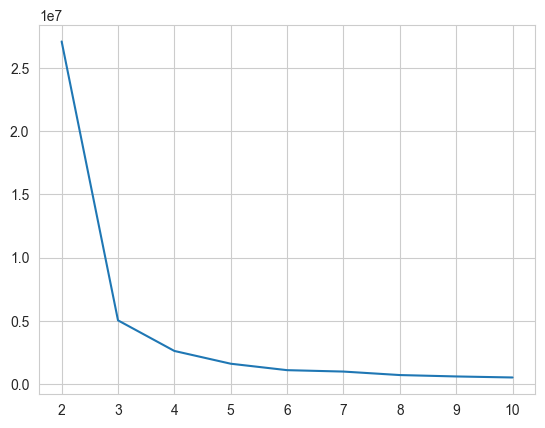

In [228]:
inertias = []
ks = range(2, 11)

for k in ks:
  kmeans_result = (KMeans(n_clusters=k, random_state=42, n_init='auto').fit(supervised_cluster_data))
  inertias.append(kmeans_result.inertia_)
  
sns.lineplot(x=ks, y=inertias)
plt.show()

In [229]:
kmeans_category = KMeans(n_clusters=10, n_init='auto')      # does not follow elbow but more clusters better separates on category embedding
kmeans_category.fit(supervised_cluster_data)
tsne_embeddings_df['supervised_cluster'] = kmeans_category.predict(supervised_cluster_data)

supervised_cluster_centers = kmeans_category.cluster_centers_

In [239]:
fig = px.scatter_3d(tsne_embeddings_df.head(500), x='stars', y='sentiment', z='category_component',
                    color='supervised_cluster',
                    hover_data=['review', 'general_category', 'stars', 'sentiment'])

fig.show()

# Supervised Learning (Predicting Review Rating)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = np.load('embeddings.npy')

In [3]:
labels = pd.read_csv('under-sample.csv')['stars']
embeddings = pd.DataFrame(data)

In [4]:
labels

0         1.0
1         5.0
2         5.0
3         2.0
4         5.0
         ... 
327657    5.0
327658    5.0
327659    5.0
327660    5.0
327661    5.0
Name: stars, Length: 327662, dtype: float64

In [5]:
embeddings

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.439325,-0.682406,-0.673594,0.476764,-0.322630,-0.289587,-0.971796,-0.243982,0.371537,0.602596,...,0.243212,-0.634313,-0.122451,0.594080,-1.049217,-0.484577,-1.020499,0.402851,-0.495940,0.531883
1,0.305087,-0.127651,-0.209986,0.404762,0.552883,-0.020585,-0.062873,-0.568029,-0.332120,-0.130250,...,-0.888367,-0.342813,0.012810,-0.498089,-0.136595,-0.548513,0.311660,0.223268,-0.226586,-0.069075
2,-0.229291,-1.034940,-0.679176,0.071638,0.251054,-0.260691,-0.454224,-0.475818,0.131180,0.564549,...,-0.418233,-0.442920,-0.332616,0.244606,-0.534785,-0.658122,-0.980320,-0.037407,-1.119320,0.326172
3,-0.983781,0.373828,0.620552,0.231366,-0.044346,0.553025,-0.247402,-0.552601,-0.215788,-1.269489,...,-0.330496,0.909710,0.801179,-0.083926,-0.032956,0.865100,-0.729443,0.222648,-0.187046,1.161810
4,-0.384294,-1.125762,-0.200058,0.229588,0.324902,0.646749,-0.449385,-1.246233,0.805815,0.503905,...,-1.041725,-0.414013,0.562926,-0.873566,0.763939,-0.514713,-0.913831,0.562077,-0.354985,-0.640136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327657,-0.019851,-0.341211,-0.537466,0.101686,0.230673,0.746317,-0.557398,-1.110050,0.560732,0.708126,...,-0.796369,-0.338606,0.874495,-0.813324,-0.481205,-0.664062,-0.318348,0.307294,-0.117685,0.196572
327658,-0.069315,-0.963177,-0.826324,0.384276,0.186533,0.451003,-0.623645,-0.561217,-0.052340,0.358365,...,-1.219544,-0.440254,-0.193069,-0.709089,0.027073,-0.704814,-0.147694,0.477097,-0.181089,-0.650796
327659,0.226185,-0.674745,-0.433839,0.275807,0.191941,0.682916,0.341908,-0.503522,0.176282,0.130044,...,-1.009993,-0.625784,0.129250,-0.681478,0.612080,-1.218316,-0.407127,0.154350,-0.169552,0.392742
327660,-0.221416,-1.585322,-1.337286,0.329141,-0.405752,0.360811,-0.395144,0.442768,-0.116486,0.943206,...,-1.313192,0.092170,-1.140614,0.159778,-0.166666,-0.506728,-0.045201,-0.515075,0.611105,-0.506982


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, classification_report

## Random Forest Classifier

In [10]:
X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size = 0.2, random_state = 42)

In [8]:
rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [9]:
f1_score = f1_score(y_test, y_pred, average = 'weighted')
print(f1_score)

0.5851911658972694


In [10]:
print(classification_report(y_test, y_pred))
pd.DataFrame(confusion_matrix(y_test, y_pred, normalize = 'true'), columns = rf_model.classes_, index = rf_model.classes_)

              precision    recall  f1-score   support

         1.0       0.66      0.81      0.73      9908
         2.0       0.38      0.12      0.18      5069
         3.0       0.38      0.15      0.22      6465
         4.0       0.43      0.30      0.35     13666
         5.0       0.70      0.91      0.79     30425

    accuracy                           0.63     65533
   macro avg       0.51      0.46      0.45     65533
weighted avg       0.58      0.63      0.59     65533


,1.0,2.0,3.0,4.0,5.0
1.0,0.813282,0.038050,0.026544,0.031994,0.090129
2.0,0.425725,0.120734,0.138094,0.149142,0.166305
3.0,0.139211,0.066976,0.150039,0.354679,0.289095
4.0,0.032124,0.009586,0.036221,0.302576,0.619494
5.0,0.018866,0.001676,0.003977,0.070074,0.905407


## XGBoost Classifier

In [12]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

In [13]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [14]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [15]:
xgbclassifier = XGBClassifier(enable_categorical=True)
xgbclassifier.fit(X_train, y_train_encoded)
y_pred_xgb = xgbclassifier.predict(X_test)

In [16]:
f1_score_xgb = f1_score(y_test, y_pred_xgb, average = 'weighted')
print(f1_score)

0.5851911658972694


In [17]:
print(classification_report(y_test_encoded, y_pred_xgb))
pd.DataFrame(confusion_matrix(y_test_encoded, y_pred_xgb, normalize = 'true'), columns = xgbclassifier.classes_, index = xgbclassifier.classes_)

              precision    recall  f1-score   support

           0       0.70      0.82      0.76      9908
           1       0.38      0.25      0.30      5069
           2       0.42      0.26      0.32      6465
           3       0.47      0.39      0.43     13666
           4       0.75      0.87      0.80     30425

    accuracy                           0.65     65533
   macro avg       0.54      0.52      0.52     65533
weighted avg       0.62      0.65      0.63     65533


,0,1,2,3,4
0,0.816108,0.084780,0.030077,0.018672,0.050363
1,0.376011,0.249753,0.178536,0.107516,0.088183
2,0.113998,0.122351,0.261408,0.335499,0.166744
3,0.022830,0.018806,0.065125,0.394336,0.498902
4,0.014462,0.004503,0.008677,0.105538,0.866820
